In [ ]:
# --- CÀI & IMPORT THƯ VIỆN ---
!pip install pandas numpy scikit-learn matplotlib seaborn --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Đã sẵn sàng môi trường.")


✅ Đã sẵn sàng môi trường.


In [ ]:
# --- BƯỚC 2: ĐỌC FILE DỮ LIỆU ---
from google.colab import files

# Tải file từ máy bạn lên (chọn file Sleep_health_and_lifestyle_preprocessing.csv)
uploaded = files.upload()

# Đọc dữ liệu vào DataFrame
df = pd.read_csv(next(iter(uploaded)))
print("✅ Đọc dữ liệu thành công!")

# Xem kích thước & vài dòng đầu
print("\nKích thước dữ liệu:", df.shape)
df.head()


Saving Sleep_health_and_lifestyle_preprocessing.csv to Sleep_health_and_lifestyle_preprocessing.csv


NameError: name 'pd' is not defined

In [ ]:
# --- BƯỚC 3: CHUẨN BỊ DỮ LIỆU CHO MÔ HÌNH ---

# Giả sử cột 'Quality of Sleep' là biến mục tiêu (target)
y = df['Quality of Sleep']

# Xóa cột này khỏi dữ liệu đầu vào
X = df.drop(columns=['Quality of Sleep'])

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% - 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Dữ liệu đã chia thành công!")
print("Kích thước tập train:", X_train.shape)
print("Kích thước tập test:", X_test.shape)


✅ Dữ liệu đã chia thành công!
Kích thước tập train: (287, 22)
Kích thước tập test: (72, 22)


In [ ]:
# --- BƯỚC 4: HUẤN LUYỆN MÔ HÌNH RANDOM FOREST ---

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Khởi tạo mô hình
rf_model = RandomForestClassifier(
    n_estimators=100,       # số lượng cây
    max_depth=None,         # độ sâu tối đa (mặc định: không giới hạn)
    random_state=42
)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = rf_model.predict(X_test)

# Đánh giá mô hình
print("🎯 Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred))
print("\n📊 Báo cáo phân loại (Classification Report):\n", classification_report(y_test, y_pred))
print("\n🧩 Ma trận nhầm lẫn (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# kiểm tra vài giá trị và kiểu dữ liệu
print(df['Quality of Sleep'].head(20))
print(df['Quality of Sleep'].dtype)
print("Min, Max:", df['Quality of Sleep'].min(), df['Quality of Sleep'].max())


0    -1.223320
1    -1.223320
2    -1.223320
3    -0.334308
4    -0.334308
5    -0.334308
6    -1.223320
7    -0.334308
8    -1.223320
9    -1.223320
10   -1.223320
11   -1.223320
12   -1.223320
13   -0.334308
14   -0.334308
15   -0.334308
16   -0.334308
17   -0.334308
18   -0.334308
19   -0.334308
Name: Quality of Sleep, dtype: float64
float64
Min, Max: -2.112331111351524 1.4437151675474078


In [ ]:
# tạo cột nhị phân: 1 = Good, 0 = Poor
df['SleepQualityBinary'] = (df['Quality of Sleep'] >= 0).astype(int)

# kiểm tra phân bố
print(df['SleepQualityBinary'].value_counts())


SleepQualityBinary
0    181
1    178
Name: count, dtype: int64


In [ ]:
# chuẩn bị X, y (dùng cột nhị phân)
X = df.drop(columns=['Quality of Sleep', 'SleepQualityBinary'])  # giữ các feature còn lại
y = df['SleepQualityBinary']

# kiểm tra có giá trị thiếu hoặc không phải số trong y
print("Unique y values:", y.unique())

# chia train/test stratified
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# huấn luyện Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# dự đoán và đánh giá
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion matrix:\\n", confusion_matrix(y_test, y_pred))


Unique y values: [0 1]
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Confusion matrix:\n [[36  0]
 [ 0 36]]


In [ ]:
from sklearn.metrics import accuracy_score

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Tính độ chính xác
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Độ chính xác trên tập huấn luyện:", train_acc)
print("Độ chính xác trên tập kiểm tra:", test_acc)



Độ chính xác trên tập huấn luyện: 1.0
Độ chính xác trên tập kiểm tra: 1.0


                         Feature  Importance
5                   Stress Level    0.241711
3                 Sleep Duration    0.219016
0                      Person ID    0.090008
6                     Heart Rate    0.079288
2                            Age    0.078955
4        Physical Activity Level    0.052976
11             Occupation_Doctor    0.046836
8                 Sleep Disorder    0.044653
21       BMI Category_Overweight    0.033143
9                    Systolic_BP    0.025183
7                    Daily Steps    0.024332
10                  Diastolic_BP    0.021077
12           Occupation_Engineer    0.020620
1                         Gender    0.006738
19            Occupation_Teacher    0.004045
20    BMI Category_Normal Weight    0.003534
15              Occupation_Nurse    0.002523
13             Occupation_Lawyer    0.002304
16        Occupation_Salesperson    0.002019
14            Occupation_Manager    0.000958
18  Occupation_Software Engineer    0.000070
17        

/tmp/ipython-input-741565580.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


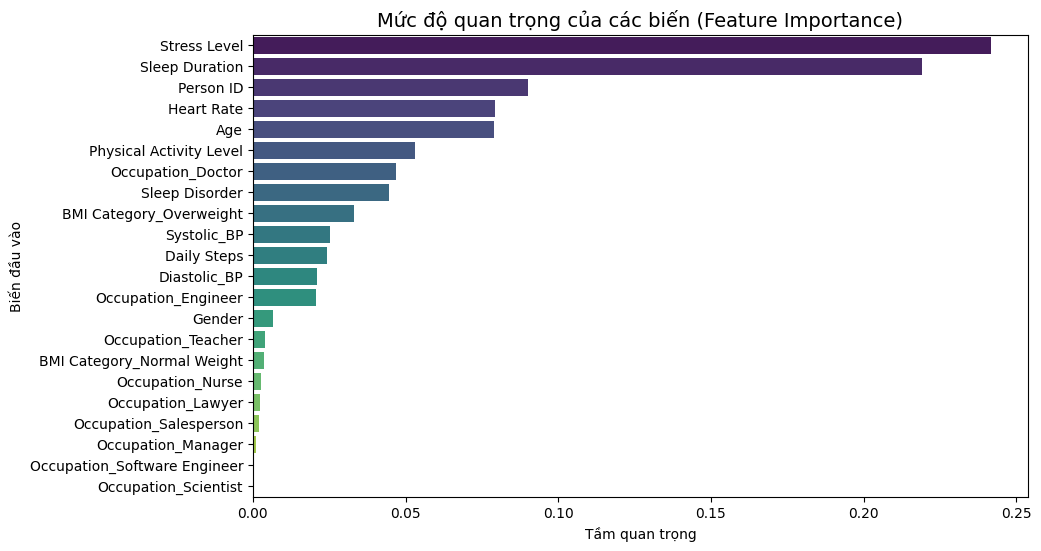

In [ ]:
# Lấy tầm quan trọng của từng biến
importances = rf_model.feature_importances_

# Tạo DataFrame để hiển thị gọn hơn
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Hiển thị bảng
print(feature_importance)

# Vẽ biểu đồ trực quan
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Mức độ quan trọng của các biến (Feature Importance)', fontsize=14)
plt.xlabel('Tầm quan trọng')
plt.ylabel('Biến đầu vào')
plt.show()


Độ chính xác trung bình qua cross-validation: 0.9127151799687011
Sai số chuẩn: 0.16771148258604526


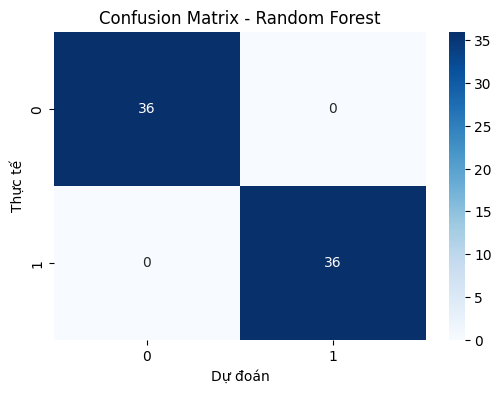

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Kiểm định chéo 5 lần
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Độ chính xác trung bình qua cross-validation:", cv_scores.mean())
print("Sai số chuẩn:", cv_scores.std())

# Vẽ confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()


In [ ]:
# --- DỰ ĐOÁN XÁC SUẤT CHO RANDOM FOREST ---
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

# Chuyển y_test sang dạng one-hot (đa lớp)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Dự đoán xác suất cho từng lớp
y_score = rf_model.predict_proba(X_test)


NameError: name 'y_test' is not defined

In [ ]:
# --- HUẤN LUYỆN LẠI MÔ HÌNH RANDOM FOREST ---
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

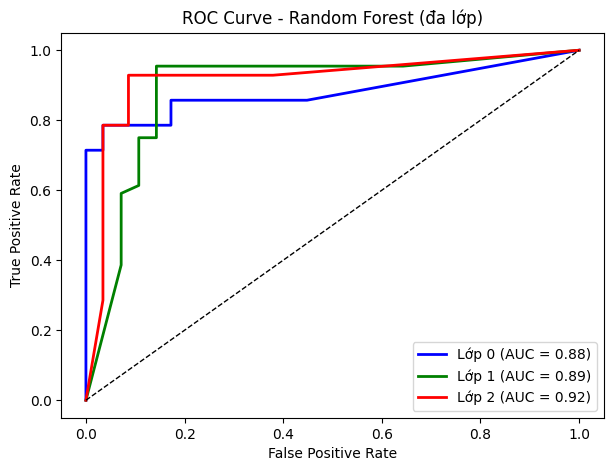

🌟 AUC trung bình của Random Forest: 0.895


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

# --- CHUYỂN Y_TEST SANG ONE-HOT ---
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# --- DỰ ĐOÁN XÁC SUẤT ---
y_score = rf_model.predict_proba(X_test)

# --- TÍNH ROC VÀ AUC ---
fpr, tpr, roc_auc = dict(), dict(), dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- VẼ BIỂU ĐỒ ---
colors = cycle(['blue', 'green', 'red'])
plt.figure(figsize=(7, 5))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Lớp {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (đa lớp)')
plt.legend(loc='lower right')
plt.show()

# --- AUC TRUNG BÌNH ---
auc_mean = np.mean(list(roc_auc.values()))
print(f"🌟 AUC trung bình của Random Forest: {auc_mean:.3f}")


                    Feature  Importance
5              Stress Level    0.241711
3            Sleep Duration    0.219016
0                 Person ID    0.090008
6                Heart Rate    0.079288
2                       Age    0.078955
4   Physical Activity Level    0.052976
11        Occupation_Doctor    0.046836
8            Sleep Disorder    0.044653
21  BMI Category_Overweight    0.033143
9               Systolic_BP    0.025183


/tmp/ipython-input-2292824109.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance.head(10), x='Importance', y='Feature', palette='viridis')


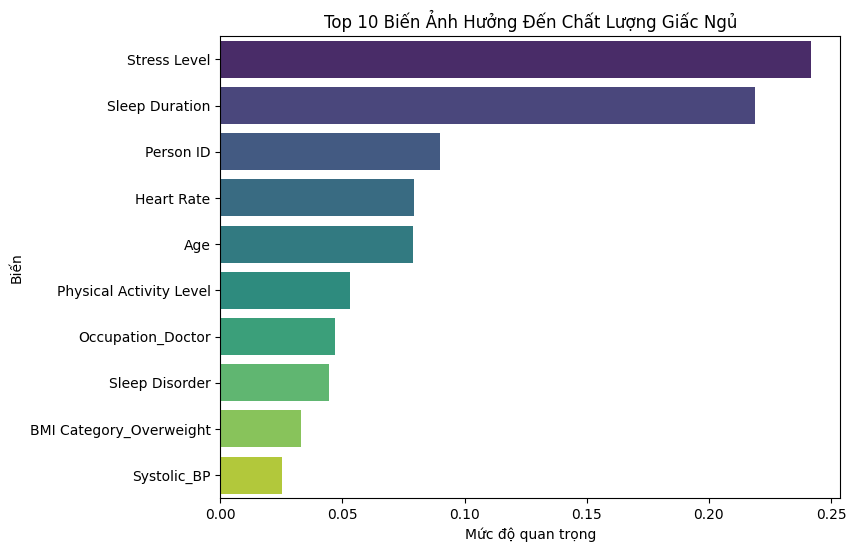

In [ ]:
import pandas as pd
import numpy as np

# Lấy độ quan trọng của từng biến
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Hiển thị top 10 biến quan trọng
print(importance.head(10))

# Vẽ biểu đồ
plt.figure(figsize=(8,6))
sns.barplot(data=importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Biến Ảnh Hưởng Đến Chất Lượng Giấc Ngủ')
plt.xlabel('Mức độ quan trọng')
plt.ylabel('Biến')
plt.show()


In [ ]:
df.columns


NameError: name 'df' is not defined

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))

print("✅ Đọc dữ liệu thành công!")
print(df.shape)
df.head()



Saving Sleep_health_and_lifestyle_preprocessing.csv to Sleep_health_and_lifestyle_preprocessing.csv
✅ Đọc dữ liệu thành công!
(359, 23)


,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Overweight
0,1,1,-1.794529,-1.328865,-1.223320,-0.847284,0.369445,2.284225,-1.816371,1,...,False,False,False,False,False,False,True,False,False,True
1,2,1,-1.678220,-1.202256,-1.223320,0.019311,1.503040,1.664394,2.020155,1,...,False,False,False,False,False,False,False,False,False,False
2,3,1,-1.678220,-1.202256,-1.223320,0.019311,1.503040,1.664394,2.020155,1,...,False,False,False,False,False,False,False,False,False,False
3,8,1,-1.561911,0.823487,-0.334308,0.741474,0.369445,0.114816,0.697215,1,...,False,False,False,False,False,False,False,False,False,False
4,9,1,-1.561911,0.823487,-0.334308,0.741474,0.369445,0.114816,0.697215,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.columns
df.dtypes



,0
Person ID,int64
Gender,int64
Age,float64
Sleep Duration,float64
Quality of Sleep,float64
Physical Activity Level,float64
Stress Level,float64
Heart Rate,float64
Daily Steps,float64
Sleep Disorder,int64


In [ ]:
df = df.drop(columns=['Person ID'])


KeyError: "['Person ID'] not found in axis"

In [ ]:
df.columns.tolist()


['Gender',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder',
 'Systolic_BP',
 'Diastolic_BP',
 'Occupation_Doctor',
 'Occupation_Engineer',
 'Occupation_Lawyer',
 'Occupation_Manager',
 'Occupation_Nurse',
 'Occupation_Salesperson',
 'Occupation_Scientist',
 'Occupation_Software Engineer',
 'Occupation_Teacher',
 'BMI Category_Normal Weight',
 'BMI Category_Overweight']

In [ ]:
# ================================================
# 🧭 PHÂN LOẠI VỚI LOGISTIC REGRESSION
# Dự đoán khả năng mắc rối loạn giấc ngủ
# ================================================

# --- 1️⃣ XÁC ĐỊNH BIẾN ĐẦU VÀO & BIẾN MỤC TIÊU ---
X = df.drop(columns=['Sleep Disorder'])  # X: dữ liệu đầu vào (features)
y = df['Sleep Disorder']                 # y: biến mục tiêu (target)


NameError: name 'df' is not defined

In [ ]:
# --- 2️⃣ CHIA DỮ LIỆU TRAIN / TEST ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,                      # tập dữ liệu đầu vào và đầu ra
    test_size=0.2,             # 20% dữ liệu dùng cho kiểm tra
    random_state=42,           # cố định kết quả chia
    stratify=y                 # đảm bảo tỉ lệ các lớp không bị lệch
)


NameError: name 'X' is not defined

In [ ]:
# --- 3️⃣ CHUẨN HÓA DỮ LIỆU ---
# Logistic Regression yêu cầu dữ liệu có cùng thang đo
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                     # khởi tạo bộ chuẩn hóa
X_train_scaled = scaler.fit_transform(X_train)  # học và áp dụng cho tập train
X_test_scaled = scaler.transform(X_test)        # chỉ áp dụng cho tập test


NameError: name 'X_train' is not defined

In [ ]:
# --- 4️⃣ KHỞI TẠO MÔ HÌNH LOGISTIC REGRESSION ---
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    solver='liblinear',   # bộ giải phù hợp cho tập dữ liệu nhỏ/vừa
    penalty='l2',         # dùng regularization L2
    C=1.0,                # hệ số điều chỉnh mức phạt (C nhỏ → phạt mạnh)
    random_state=42       # cố định kết quả
)


In [ ]:
# --- 5️⃣ HUẤN LUYỆN MÔ HÌNH ---
log_reg.fit(X_train_scaled, y_train)  # huấn luyện mô hình trên tập train


LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# --- 6️⃣ DỰ ĐOÁN TRÊN TẬP KIỂM TRA ---
y_pred = log_reg.predict(X_test_scaled)  # dự đoán nhãn đầu ra


NameError: name 'X_test_scaled' is not defined

In [ ]:
# --- 7️⃣ ĐÁNH GIÁ HIỆU SUẤT ---
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Độ chính xác tổng thể
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))


🎯 Accuracy: 0.8472222222222222


In [ ]:
# --- 8️⃣ MA TRẬN NHẦM LẪN ---
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📊 Confusion Matrix:
 [[10  4  0]
 [ 1 40  3]
 [ 2  1 11]]


In [ ]:
# --- 9️⃣ BÁO CÁO PHÂN LOẠI CHI TIẾT ---
print("📋 Classification Report:\n", classification_report(y_test, y_pred))


📋 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.89      0.91      0.90        44
           2       0.79      0.79      0.79        14

    accuracy                           0.85        72
   macro avg       0.81      0.80      0.81        72
weighted avg       0.85      0.85      0.85        72



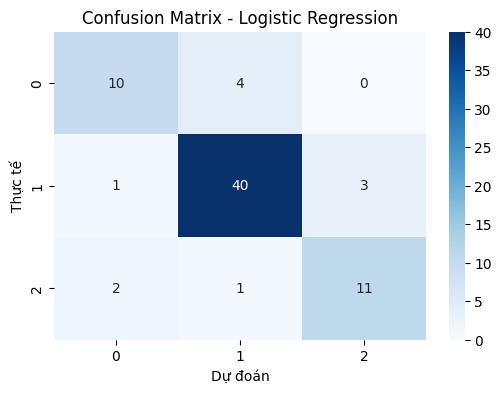

In [ ]:
# --- VẼ CONFUSION MATRIX CHO LOGISTIC REGRESSION ---

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()


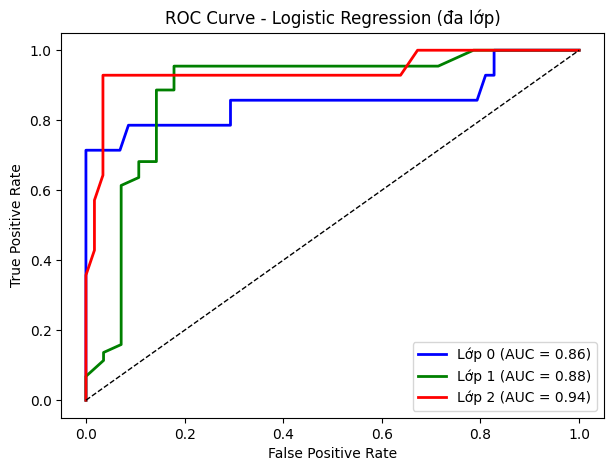

In [ ]:
# --- VẼ ROC CURVE & TÍNH AUC SCORE ---

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from itertools import cycle
import numpy as np

# Chuyển y thành dạng nhị phân (one-hot) cho đa lớp
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Huấn luyện mô hình theo dạng One-vs-Rest
clf = OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42))
clf.fit(X_train, label_binarize(y_train, classes=[0, 1, 2]))

# Dự đoán xác suất
y_score = clf.decision_function(X_test)

# Tính ROC curve và AUC cho từng lớp
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=[0,1,2])[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Vẽ ROC cho từng lớp
colors = cycle(['blue', 'green', 'red'])
plt.figure(figsize=(7, 5))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Lớp {i} (AUC = {roc_auc[i]:.2f})')

# Vẽ đường baseline
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (đa lớp)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Huấn luyện mô hình Logistic Regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

,Variable,Coefficient,Odds_Ratio
2,Sleep Duration,2.316839,10.143557
4,Stress Level,-1.960769,0.140750
15,Occupation_Salesperson,-1.723490,0.178442
0,Gender,-0.917182,0.399644
7,Sleep Disorder,-0.867308,0.420081
1,Age,0.750336,2.117711
5,Heart Rate,-0.715019,0.489183
12,Occupation_Lawyer,0.618747,1.856600
3,Physical Activity Level,0.545361,1.725231
14,Occupation_Nurse,-0.491983,0.611413


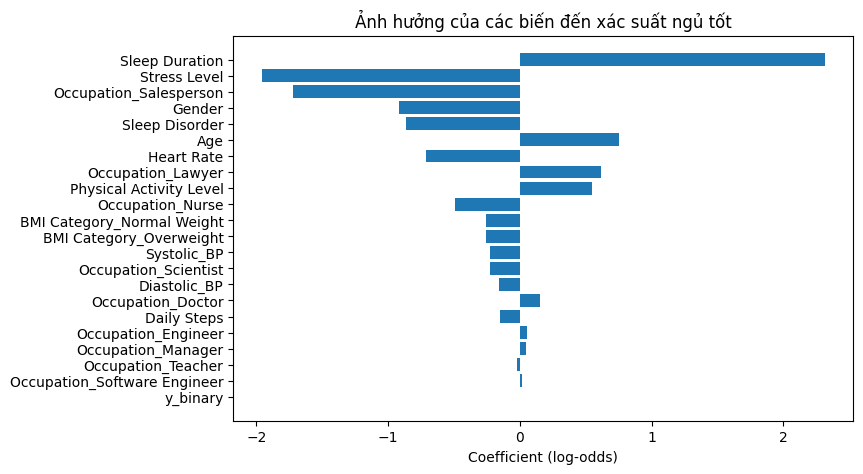

In [ ]:
# Trích hệ số và tính odds ratio từ Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tạo DataFrame chứa hệ số và odds ratio
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model_lr.coef_[0],
})
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])

# Sắp xếp theo giá trị tuyệt đối của hệ số
coefficients = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index)

# Hiển thị bảng
display(coefficients)

# Vẽ biểu đồ thể hiện mức ảnh hưởng (log-odds)
plt.figure(figsize=(8,5))
plt.barh(coefficients['Variable'], coefficients['Coefficient'])
plt.xlabel('Coefficient (log-odds)')
plt.title('Ảnh hưởng của các biến đến xác suất ngủ tốt')
plt.gca().invert_yaxis()
plt.show()


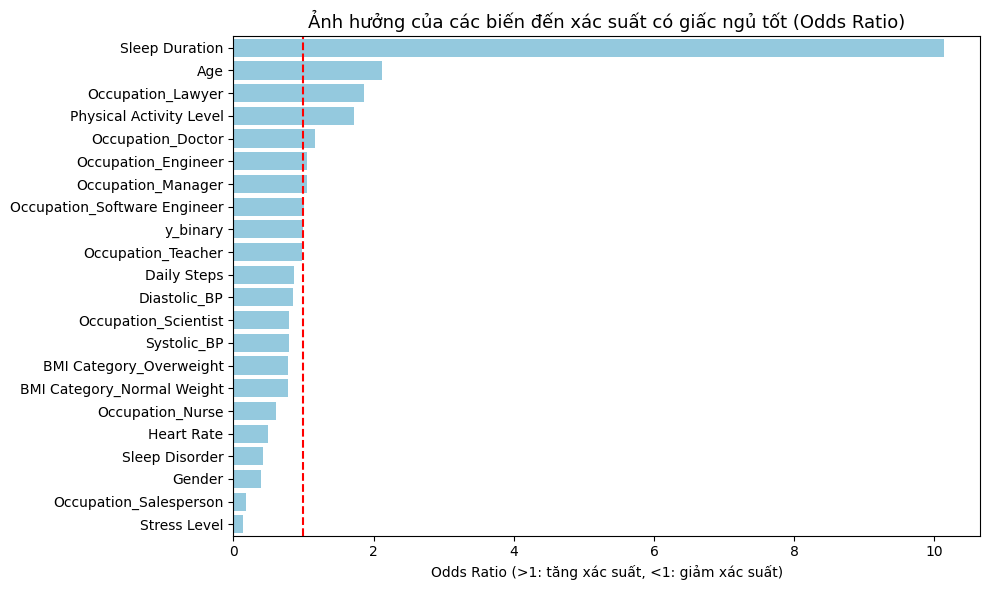

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sắp xếp theo Odds Ratio
coef_plot = coefficients.sort_values(by='Odds_Ratio', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Odds_Ratio', y='Variable', data=coef_plot, color='skyblue')
plt.axvline(x=1, color='red', linestyle='--')  # Đường tham chiếu OR=1
plt.title('Ảnh hưởng của các biến đến xác suất có giấc ngủ tốt (Odds Ratio)', fontsize=13)
plt.xlabel('Odds Ratio (>1: tăng xác suất, <1: giảm xác suất)')
plt.ylabel('')
plt.tight_layout()
plt.show()


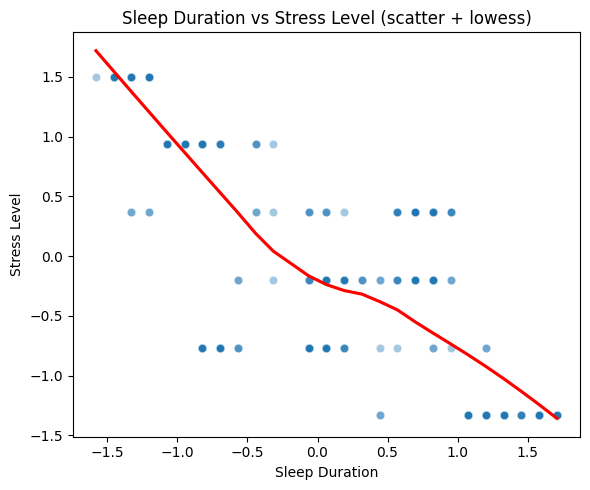

/tmp/ipython-input-4272882609.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('stress_q')['Sleep Duration'].agg(['mean','count']))


              mean  count
stress_q                 
Q1_low    0.603060    139
Q2        0.433612     63
Q3       -0.237551     92
Q4_high  -1.373665     65


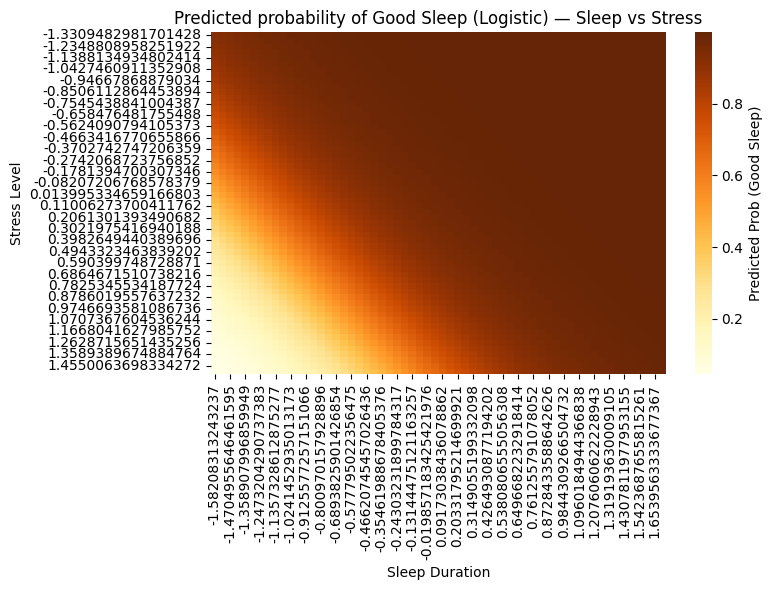

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

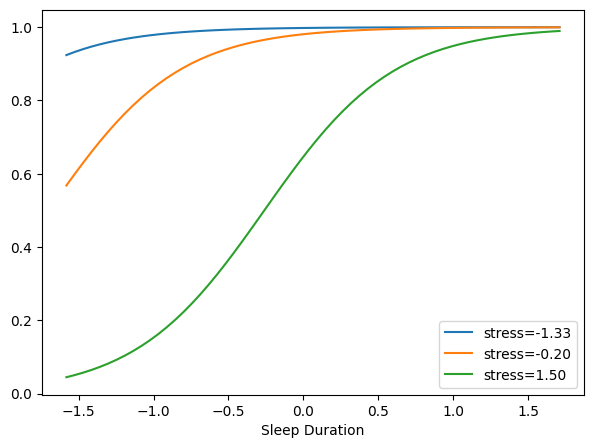

In [ ]:
# 1) Hàm hỗ trợ predict_proba an toàn (dùng pipe hoặc model thuần)
import numpy as np
import pandas as pd

def safe_predict_proba(df):
    # df: DataFrame với cùng cột như X (features)
    try:
        # nếu tồn tại pipeline tên pipe_lr
        return pipe_lr.predict_proba(df)[:,1]
    except Exception:
        try:
            # nếu tồn tại model_lr (estimator thuần)
            # đảm bảo cột đúng thứ tự nếu model có feature_names_in_
            if hasattr(model_lr, 'feature_names_in_'):
                df2 = df.reindex(columns=model_lr.feature_names_in_, fill_value=0)
            else:
                df2 = df
            return model_lr.predict_proba(df2)[:,1]
        except Exception as e:
            raise RuntimeError("Không thể predict_proba tự động: " + str(e))

# 2) Scatter + lowess: Sleep Duration vs Stress Level (quan sát gốc)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='Sleep Duration', y='Stress Level', alpha=0.4)
sns.regplot(data=df, x='Sleep Duration', y='Stress Level', scatter=False, lowess=True, color='red')
plt.title('Sleep Duration vs Stress Level (scatter + lowess)')
plt.tight_layout()
plt.show()

# 3) Quan sát trung bình Sleep Duration theo nhóm stress (quartile)
df['stress_q'] = pd.qcut(df['Stress Level'], 4, labels=['Q1_low','Q2','Q3','Q4_high'])
print(df.groupby('stress_q')['Sleep Duration'].agg(['mean','count']))

# 4) Surface / heatmap xác suất (an toàn với feature order)
sleep = np.linspace(X['Sleep Duration'].min(), X['Sleep Duration'].max(), 60)
stress = np.linspace(X['Stress Level'].min(), X['Stress Level'].max(), 60)
grid = pd.DataFrame([(s, t) for s in sleep for t in stress], columns=['Sleep Duration','Stress Level'])
for col in X.columns:
    if col not in grid.columns:
        grid[col] = X[col].mean()
grid = grid[X.columns]  # sắp thứ tự cột theo X

# predict proba an toàn
grid['prob'] = safe_predict_proba(grid)

# pivot và vẽ heatmap
pivot = grid.pivot_table(index='Stress Level', columns='Sleep Duration', values='prob')
plt.figure(figsize=(8,6))
sns.heatmap(pivot, cmap='YlOrBr', cbar_kws={'label':'Predicted Prob (Good Sleep)'})
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.title('Predicted probability of Good Sleep (Logistic) — Sleep vs Stress')
plt.tight_layout()
plt.show()

# 5) Biểu đồ xác suất theo Sleep Duration cho 3 mức stress (low/median/high)
stress_vals = [df['Stress Level'].quantile(0.1), df['Stress Level'].median(), df['Stress Level'].quantile(0.9)]
plt.figure(figsize=(7,5))
for s in stress_vals:
    tmp = pd.DataFrame({ 'Sleep Duration': sleep, 'Stress Level': s })
    for col in X.columns:
        if col not in tmp.columns:
            tmp[col] = X[col].mean()
    tmp = tmp[X.columns]
    probs = safe_predict_proba(tmp)
    plt.plot(sleep, probs, label=f'stress={s:.2f}')
plt.legend()
plt.xlabel('Sleep Duration')
plt.ylabel


In [ ]:
# Import thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Giả sử DataFrame chính của bạn là df, và cột mục tiêu là 'Quality of Sleep'
X = df.drop(columns=['Quality of Sleep'])  # biến độc lập
y = df['Quality of Sleep']                 # biến phụ thuộc (mục tiêu)

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Chuẩn hóa dữ liệu (đặc biệt quan trọng với Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# --- ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST ---

# 1️⃣ Import lại thư viện đánh giá (phòng khi chưa có)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2️⃣ Dự đoán nhãn cho tập test
y_pred_rf = rf_model.predict(X_test)

# 3️⃣ Tính độ chính xác (Accuracy)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# 4️⃣ In ra kết quả
print(f"🎯 Accuracy (Random Forest): {accuracy_rf}")


🎯 Accuracy (Random Forest): 0.8888888888888888


In [ ]:
# --- HUẤN LUYỆN MÔ HÌNH LOGISTIC REGRESSION ---

from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Huấn luyện trên tập train
log_reg.fit(X_train, y_train)

# Dự đoán nhãn trên tập test
y_pred_log = log_reg.predict(X_test)

# Dự đoán xác suất (dùng cho ROC/AUC)
y_prob_log = log_reg.predict_proba(X_test)

# Đánh giá kết quả
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🎯 Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_log))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_log))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


🎯 Accuracy (Logistic Regression): 0.9027777777777778

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.89      0.95      0.92        44
           2       0.87      0.93      0.90        14

    accuracy                           0.90        72
   macro avg       0.92      0.87      0.88        72
weighted avg       0.91      0.90      0.90        72


🧩 Confusion Matrix:
 [[10  4  0]
 [ 0 42  2]
 [ 0  1 13]]


In [ ]:
# Accuracy từ Logistic Regression
acc_log = accuracy_score(y_test, y_pred_log)


/tmp/ipython-input-1415972535.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Random Forest', 'Logistic Regression'], y=[acc_rf, acc_log], palette='viridis')


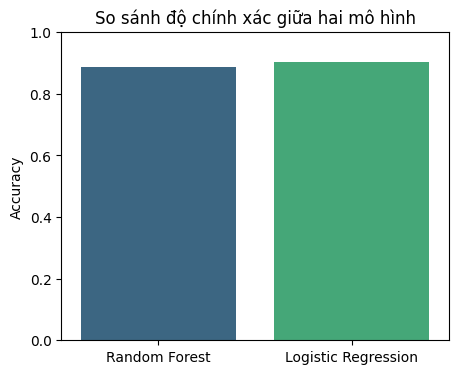

In [ ]:
# Accuracy từ Random Forest
acc_rf = accuracy_rf  # biến đã có trước đó

# So sánh bằng biểu đồ cột
plt.figure(figsize=(5,4))
sns.barplot(x=['Random Forest', 'Logistic Regression'], y=[acc_rf, acc_log], palette='viridis')
plt.title('So sánh độ chính xác giữa hai mô hình')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()


In [ ]:
# --- VẼ ROC CURVE VÀ TÍNH AUC CHO CẢ HAI MÔ HÌNH ---

from sklearn.metrics import roc_curve, roc_auc_score

# 1️⃣ Dự đoán xác suất cho lớp 1 (hoặc lớp Positive)
y_prob_rf = rf_model.predict_proba(X_test)
y_prob_log = log_reg.predict_proba(X_test)

# 2️⃣ Tính ROC curve và AUC cho từng lớp (multi-class -> dùng trung bình 'ovr')
auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr')
auc_log = roc_auc_score(y_test, y_prob_log, multi_class='ovr')

print(f"🔹 AUC - Random Forest: {auc_rf:.3f}")
print(f"🔸 AUC - Logistic Regression: {auc_log:.3f}")

# 3️


🔹 AUC - Random Forest: 0.895
🔸 AUC - Logistic Regression: 0.890
